In [1]:
import pandas as pd
import numpy as np

In [3]:
sdi_df = pd.read_excel('../../data/1/result/sdi.xlsx', dtype={'시군구코드':str})
sdi_df

시도   시군구  시군구코드    시점       SDI
0       서울특별시   종로구  11010  2014 -3.423546
1       서울특별시    중구  11020  2014 -3.994378
2       서울특별시   용산구  11030  2014 -3.276231
3       서울특별시   성동구  11040  2014 -2.385049
4       서울특별시   광진구  11050  2014 -2.047943
...       ...   ...    ...   ...       ...
1140     경상남도   함양군  38380  2018  1.800430
1141     경상남도   거창군  38390  2018  1.653622
1142     경상남도   합천군  38400  2018  2.121558
1143  제주특별자치도   제주시  39010  2018 -0.529295
1144  제주특별자치도  서귀포시  39020  2018  0.169835

[1145 rows x 5 columns]

In [4]:
comm_control_var_df = pd.read_excel('../../data/2/result/comm_control_var.xlsx', dtype={'시군구코드':str, '법정_시군구코드': str})
comm_control_var_df = comm_control_var_df[['시군구코드', '시점', '총인구수', '영유아_어린이_인구_비율', '청소년_인구_비율',
       '고령인구_비율', '여성인구비율', '자연인구증가율', '인위인구증가율', '십만명당_문화기반시설수', '15분이내_접근가능인구_비율_고등학교', '15분이내_접근가능인구_비율_공공의료시설',
        '15분이내_접근가능인구_비율_대규모점포', '15분이내_접근가능인구_비율_병·의원', '15분이내_접근가능인구_비율_전통시장', '15분이내_접근가능인구_비율_종합병원',
       '15분이내_접근가능인구_비율_중학교', '15분이내_접근가능인구_비율_초등학교',
       '재정자립도', '면적', '공원면적']]
comm_control_var_df

시군구코드    시점      총인구수  영유아_어린이_인구_비율  청소년_인구_비율   고령인구_비율    여성인구비율  \
0     11010  2014  153407.0       0.107036   0.059443  0.146506  0.504817   
1     11010  2015  150750.5       0.102902   0.058060  0.151283  0.506307   
2     11010  2016  148331.5       0.099655   0.055912  0.154701  0.507259   
3     11010  2017  148098.5       0.097270   0.052425  0.158705  0.508398   
4     11010  2018  148325.5       0.095169   0.048943  0.163600  0.509777   
...     ...   ...       ...            ...        ...       ...       ...   
1140  39020  2014  155959.5       0.142486   0.065761  0.174157  0.495196   
1141  39020  2015  160374.5       0.138479   0.063386  0.175564  0.494374   
1142  39020  2016  166467.5       0.136357   0.060685  0.175313  0.493688   
1143  39020  2017  173300.5       0.135455   0.056737  0.175354  0.493273   
1144  39020  2018  178391.5       0.134286   0.053251  0.176869  0.493401   

       자연인구증가율    인위인구증가율  십만명당_문화기반시설수  ...  15분이내_접근가능인구_비율_공공의료시설  \
0     0.267263 -21.465774          37.6  ...               36.311895   
1     0.510778 -16.709729          39.4  ...               36.311895   
2     0.155058 -18.755288          41.9  ...               36.311895   
3    -0.925060  14.895492          41.4  ...               36.311895   
4    -1.705708 -10.861248          41.2  ...               36.311895   
...        ...        ...           ...  ...                     ...   
1140  0.250065  17.786669          38.5  ...               49.961622   
1141  1.003900  35.853580          37.1  ...               49.961622   
1142  0.985177  36.601739          36.3  ...               49.961622   
1143  0.346219  42.481124          35.3  ...               49.961622   
1144 -1.244454  16.682409          38.1  ...               49.961622   

      15분이내_접근가능인구_비율_대규모점포  15분이내_접근가능인구_비율_병·의원  15분이내_접근가능인구_비율_전통시장  \
0                 47.480636            100.000000             82.365145   
1                 47.480636            100.000000             82.365145   
2                 47.480636            100.000000             82.365145   
3                 47.480636            100.000000             82.365145   
4                 47.480636            100.000000             82.365145   
...                     ...                   ...                   ...   
1140              18.864451             68.586816             22.740394   
1141              18.864451             68.586816             22.740394   
1142              18.864451             68.586816             22.740394   
1143              18.864451             68.586816             22.740394   
1144              18.864451             68.586816             22.740394   

      15분이내_접근가능인구_비율_종합병원  15분이내_접근가능인구_비율_중학교  15분이내_접근가능인구_비율_초등학교  재정자립도  \
0                64.547026            95.379409             98.298118   55.0   
1                64.547026            95.379409             98.298118   50.0   
2                64.547026            95.379409             98.298118   50.4   
3                64.547026            95.379409             98.298118   50.8   
4                64.547026            95.379409             98.298118   47.4   
...                    ...                  ...                   ...    ...   
1140             14.239492            64.043628             86.316211   30.1   
1141             14.239492            64.043628             86.316211   30.3   
1142             14.239492            64.043628             86.316211   31.5   
1143             14.239492            64.043628             86.316211   33.7   
1144             14.239492            64.043628             86.316211   34.5   

               면적       공원면적  
0      23912968.7   305048.7  
1      23912894.7   309831.0  
2      23912882.9   309831.0  
3      23912788.0   309831.0  
4      23913317.6   318054.5  
...           ...        ...  
1140  870729789.0  1056816.5  
1141  870729225.9  1217377.7  
1142  870721850.6  1483306.7  
1143  871474203.7  1931242.3  
1144  8714646

In [5]:
lib_df = pd.read_excel('../../data/3/result/sgg_lib.xlsx', dtype={'시군구코드':str})

lib_df = lib_df[['시군구코드', '시점', '도서관수', '시설_연면적', '개관일수', 'AGE', '직원_정규직',
       '도서관총예산', '도서_총류', '도서_철학', '도서_종교', '도서_사회과학', '도서_순수과학', '도서_기술과학',
       '도서_예술', '도서_언어', '도서_문학', '도서_역사', '도서_국내', '도서_국외', '도서', '대출권수_총류',
       '대출권수_철학', '대출권수_종교', '대출권수_사회과학', '대출권수_순수과학', '대출권수_기술과학', '대출권수_예술',
       '대출권수_언어', '대출권수_문학', '대출권수_역사', '대출권수']]

lib_df

시군구코드    시점  도서관수       시설_연면적        개관일수        AGE  직원_정규직    도서관총예산  \
0     11010  2014     5  4365.080000  248.200000  34.200000     120   4056263   
1     11010  2015     5  4365.080000  313.400000  35.200000     109   8881945   
2     11010  2016     5  4365.080000  314.200000  36.200000     110   9549839   
3     11010  2017     5  4365.680000  312.200000  37.200000     109  10523986   
4     11010  2018     6  3721.578333  265.166667  32.000000     111  11319940   
...     ...   ...   ...          ...         ...        ...     ...       ...   
1140  39020  2014    11  1841.270000  300.545455  20.363636      60   4595559   
1141  39020  2015    11  1841.270000  303.545455  21.363636      67   5399677   
1142  39020  2016    11  1845.997273  297.545455  22.363636      74   5885110   
1143  39020  2017    11  1846.100909  280.636364  23.363636      64   6723287   
1144  39020  2018    11  1853.310000  279.181818  24.363636      71   6844464   

      도서_총류  도서_철학  ...  대출권수_철학  대출권수_종교  대출권수_사회과학  대출권수_순수과학  대출권수_기술과학  \
0     54971  47484  ...  57775.0  28488.0    67570.0   129495.0    68750.0   
1     55945  49859  ...  65215.0  28633.0    61886.0   139793.0    74229.0   
2     58052  50196  ...  52432.0  24081.0    51025.0   147009.0    59679.0   
3     57621  53259  ...  46321.0  18342.0    44181.0   122551.0    53073.0   
4     52499  53859  ...  41833.0  17611.0    43019.0   118400.0    50369.0   
...     ...    ...  ...      ...      ...        ...        ...        ...   
1140  40874  42120  ...  16010.0   6737.0    16120.0    33091.0    26442.0   
1141  42163  44948  ...  18485.0   7623.0    20230.0    37865.0    28304.0   
1142  43648  47802  ...  22075.0   8231.0    17817.0    43920.0    35152.0   
1143  44628  50684  ...  23671.0   9871.0    17513.0    47349.0    37951.0   
1144  46151  53688  ...  23306.0   9315.0    18132.0    50821.0    42747.0   

      대출권수_예술  대출권수_언어   대출권수_문학   대출권수_역사       대출권수  
0     80978.0  60915.0  525713.0  144547.0  1158860.0  
1     60600.0  63395.0  530515.0  153926.0  1178445.0  
2     65560.0  60013.0  514192.0  139848.0  1100499.0  
3     41027.0  63312.0  489197.0  118147.0   976691.0  
4     36674.0  60670.0  462117.0  113096.0   926578.0  
...       ...      ...       ...       ...        ...  
1140  17250.0  22014.0  193688.0   38796.0   359513.0  
1141  19706.0  24101.0  201908.0   42911.0   391612.0  
1142  25031.0  22788.0  209001.0   47846.0   423486.0  
1143  28645.0  25596.0  226649.0   46656.0   454634.0  
1144  27045.0  28828.0  245977.0   53187.0   487101.0  

[1145 rows x 32 columns]

In [6]:
dataset = pd.merge(sdi_df, comm_control_var_df, on=['시군구코드','시점'], how='inner')
dataset = pd.merge(dataset, lib_df, on=['시군구코드','시점'], how='inner')

dataset

시도   시군구  시군구코드    시점       SDI      총인구수  영유아_어린이_인구_비율  \
0       서울특별시   종로구  11010  2014 -3.423546  153407.0       0.107036   
1       서울특별시    중구  11020  2014 -3.994378  125273.0       0.103538   
2       서울특별시   용산구  11030  2014 -3.276231  229055.0       0.119022   
3       서울특별시   성동구  11040  2014 -2.385049  292786.5       0.122975   
4       서울특별시   광진구  11050  2014 -2.047943  361146.5       0.118682   
...       ...   ...    ...   ...       ...       ...            ...   
1140     경상남도   함양군  38380  2018  1.800430   39778.0       0.090527   
1141     경상남도   거창군  38390  2018  1.653622   62244.5       0.111351   
1142     경상남도   합천군  38400  2018  2.121558   46005.5       0.068177   
1143  제주특별자치도   제주시  39010  2018 -0.529295  478282.0       0.155724   
1144  제주특별자치도  서귀포시  39020  2018  0.169835  178391.5       0.134286   

      청소년_인구_비율   고령인구_비율    여성인구비율  ...   대출권수_철학  대출권수_종교  대출권수_사회과학  \
0      0.059443  0.146506  0.504817  ...   57775.0  28488.0    67570.0   
1      0.047456  0.145291  0.500714  ...   29961.0  10694.0    21776.0   
2      0.051581  0.137262  0.513246  ...   38235.0  16553.0    34964.0   
3      0.053449  0.118708  0.502542  ...  159147.0  86455.0   117240.0   
4      0.060341  0.102618  0.508316  ...   53339.0  14892.0    39561.0   
...         ...       ...       ...  ...       ...      ...        ...   
1140   0.047614  0.314458  0.520476  ...    2927.0    966.0     2195.0   
1141   0.056222  0.257195  0.514150  ...    6549.0   2392.0     4723.0   
1142   0.038452  0.369271  0.520677  ...    2030.0    701.0     1588.0   
1143   0.063081  0.129329  0.497487  ...   57616.0  19512.0    44067.0   
1144   0.053251  0.176869  0.493401  ...   23306.0   9315.0    18132.0   

      대출권수_순수과학  대출권수_기술과학   대출권수_예술   대출권수_언어    대출권수_문학   대출권수_역사       대출권수  
0      129495.0    68750.0   80978.0   60915.0   525713.0  144547.0  1158860.0  
1       24487.0    41994.0   60358.0   33925.0   219835.0   50810.0   480436.0  
2       42344.0    65563.0   47178.0   42155.0   282404.0   61587.0   615193.0  
3      322500.0   197439.0  120522.0  250845.0  2049698.0  353931.0  3586468.0  
4       96258.0    78661.0   42233.0   73782.0   549955.0  114378.0  1048389.0  
...         ...        ...       ...       ...        ...       ...        ...  
1140     5512.0     4822.0    5807.0    2429.0    25371.0    5512.0    54619.0  
1141     9344.0     9390.0    5783.0    4802.0    66828.0    9353.0   117053.0  
1142     3885.0     3415.0    3853.0    1152.0    20976.0    4669.0    42449.0  
1143   123263.0   109478.0   55440.0   52879.0   663261.0  119756.0  1231572.0  
1144    50821.0    42747.0   27045.0   28828.0   245977.0   53187.0   487101.0  

[1145 rows x 54 columns]

In [7]:
dataset[dataset['대출권수']==0]

시도  시군구  시군구코드    시점       SDI     총인구수  영유아_어린이_인구_비율  청소년_인구_비율  \
745  인천광역시  옹진군  23320  2017  0.577341  21330.5       0.084996   0.035888   
974  인천광역시  옹진군  23320  2018  0.658272  21158.5       0.082095   0.034312   

      고령인구_비율    여성인구비율  ...  대출권수_철학  대출권수_종교  대출권수_사회과학  대출권수_순수과학  \
745  0.219826  0.432784  ...      0.0      0.0        0.0        0.0   
974  0.231042  0.434128  ...      0.0      0.0        0.0        0.0   

     대출권수_기술과학  대출권수_예술  대출권수_언어  대출권수_문학  대출권수_역사  대출권수  
745        0.0      0.0      0.0      0.0      0.0   0.0  
974        0.0      0.0      0.0      0.0      0.0   0.0  

[2 rows x 54 columns]

In [8]:
dataset.to_excel('../data/4/result/dataset.xlsx', index=False)

## 시각화

In [9]:
import geopandas as gpd

sgg_gdf = gpd.gpd.GeoDataFrame.from_file('../../data/0/shp/sgg.shp', encoding='UTF-8', crs="epsg:4326")
sgg_gdf = sgg_gdf.astype({'SGG_AD_CD':str,'SGG_LE_CD':str})
sgg_gdf

SGG_AD_CD SGG_LE_CD     SIDO   SGG  \
0       11010     11110    서울특별시   종로구   
1       11020     11140    서울특별시    중구   
2       11030     11170    서울특별시   용산구   
3       11040     11200    서울특별시   성동구   
4       11050     11215    서울특별시   광진구   
..        ...       ...      ...   ...   
224     38380     48870     경상남도   함양군   
225     38390     48880     경상남도   거창군   
226     38400     48890     경상남도   합천군   
227     39010     50110  제주특별자치도   제주시   
228     39020     50130  제주특별자치도  서귀포시   

                                              geometry  
0    POLYGON ((126.94890 37.62325, 126.94890 37.623...  
1    POLYGON ((126.96155 37.55860, 126.96155 37.558...  
2    POLYGON ((126.94459 37.53378, 126.94460 37.533...  
3    POLYGON ((127.00815 37.54506, 127.00817 37.545...  
4    POLYGON ((127.05622 37.52832, 127.05623 37.528...  
..                                                 ...  
224  POLYGON ((127.58486 35.55391, 127.58488 35.553...  
225  POLYGON ((127.67944 35.76850, 127.67945 35.768...  
226  POLYGON ((127.95323 35.53403, 127.95323 35.534...  
227  MULTIPOLYGON (((126.94125 33.50648, 126.94125 ...  
228  MULTIPOLYGON (((126.16875 33.27659, 126.16876 ...  

[229 rows x 5 columns]

<ipython-input-10-74a65fafe4e2>:6: MatplotlibDeprecationWarning: The get_fontconfig_fonts function was deprecated in Matplotlib 3.5 and will be removed two minor releases later.
  fm.get_fontconfig_fonts()


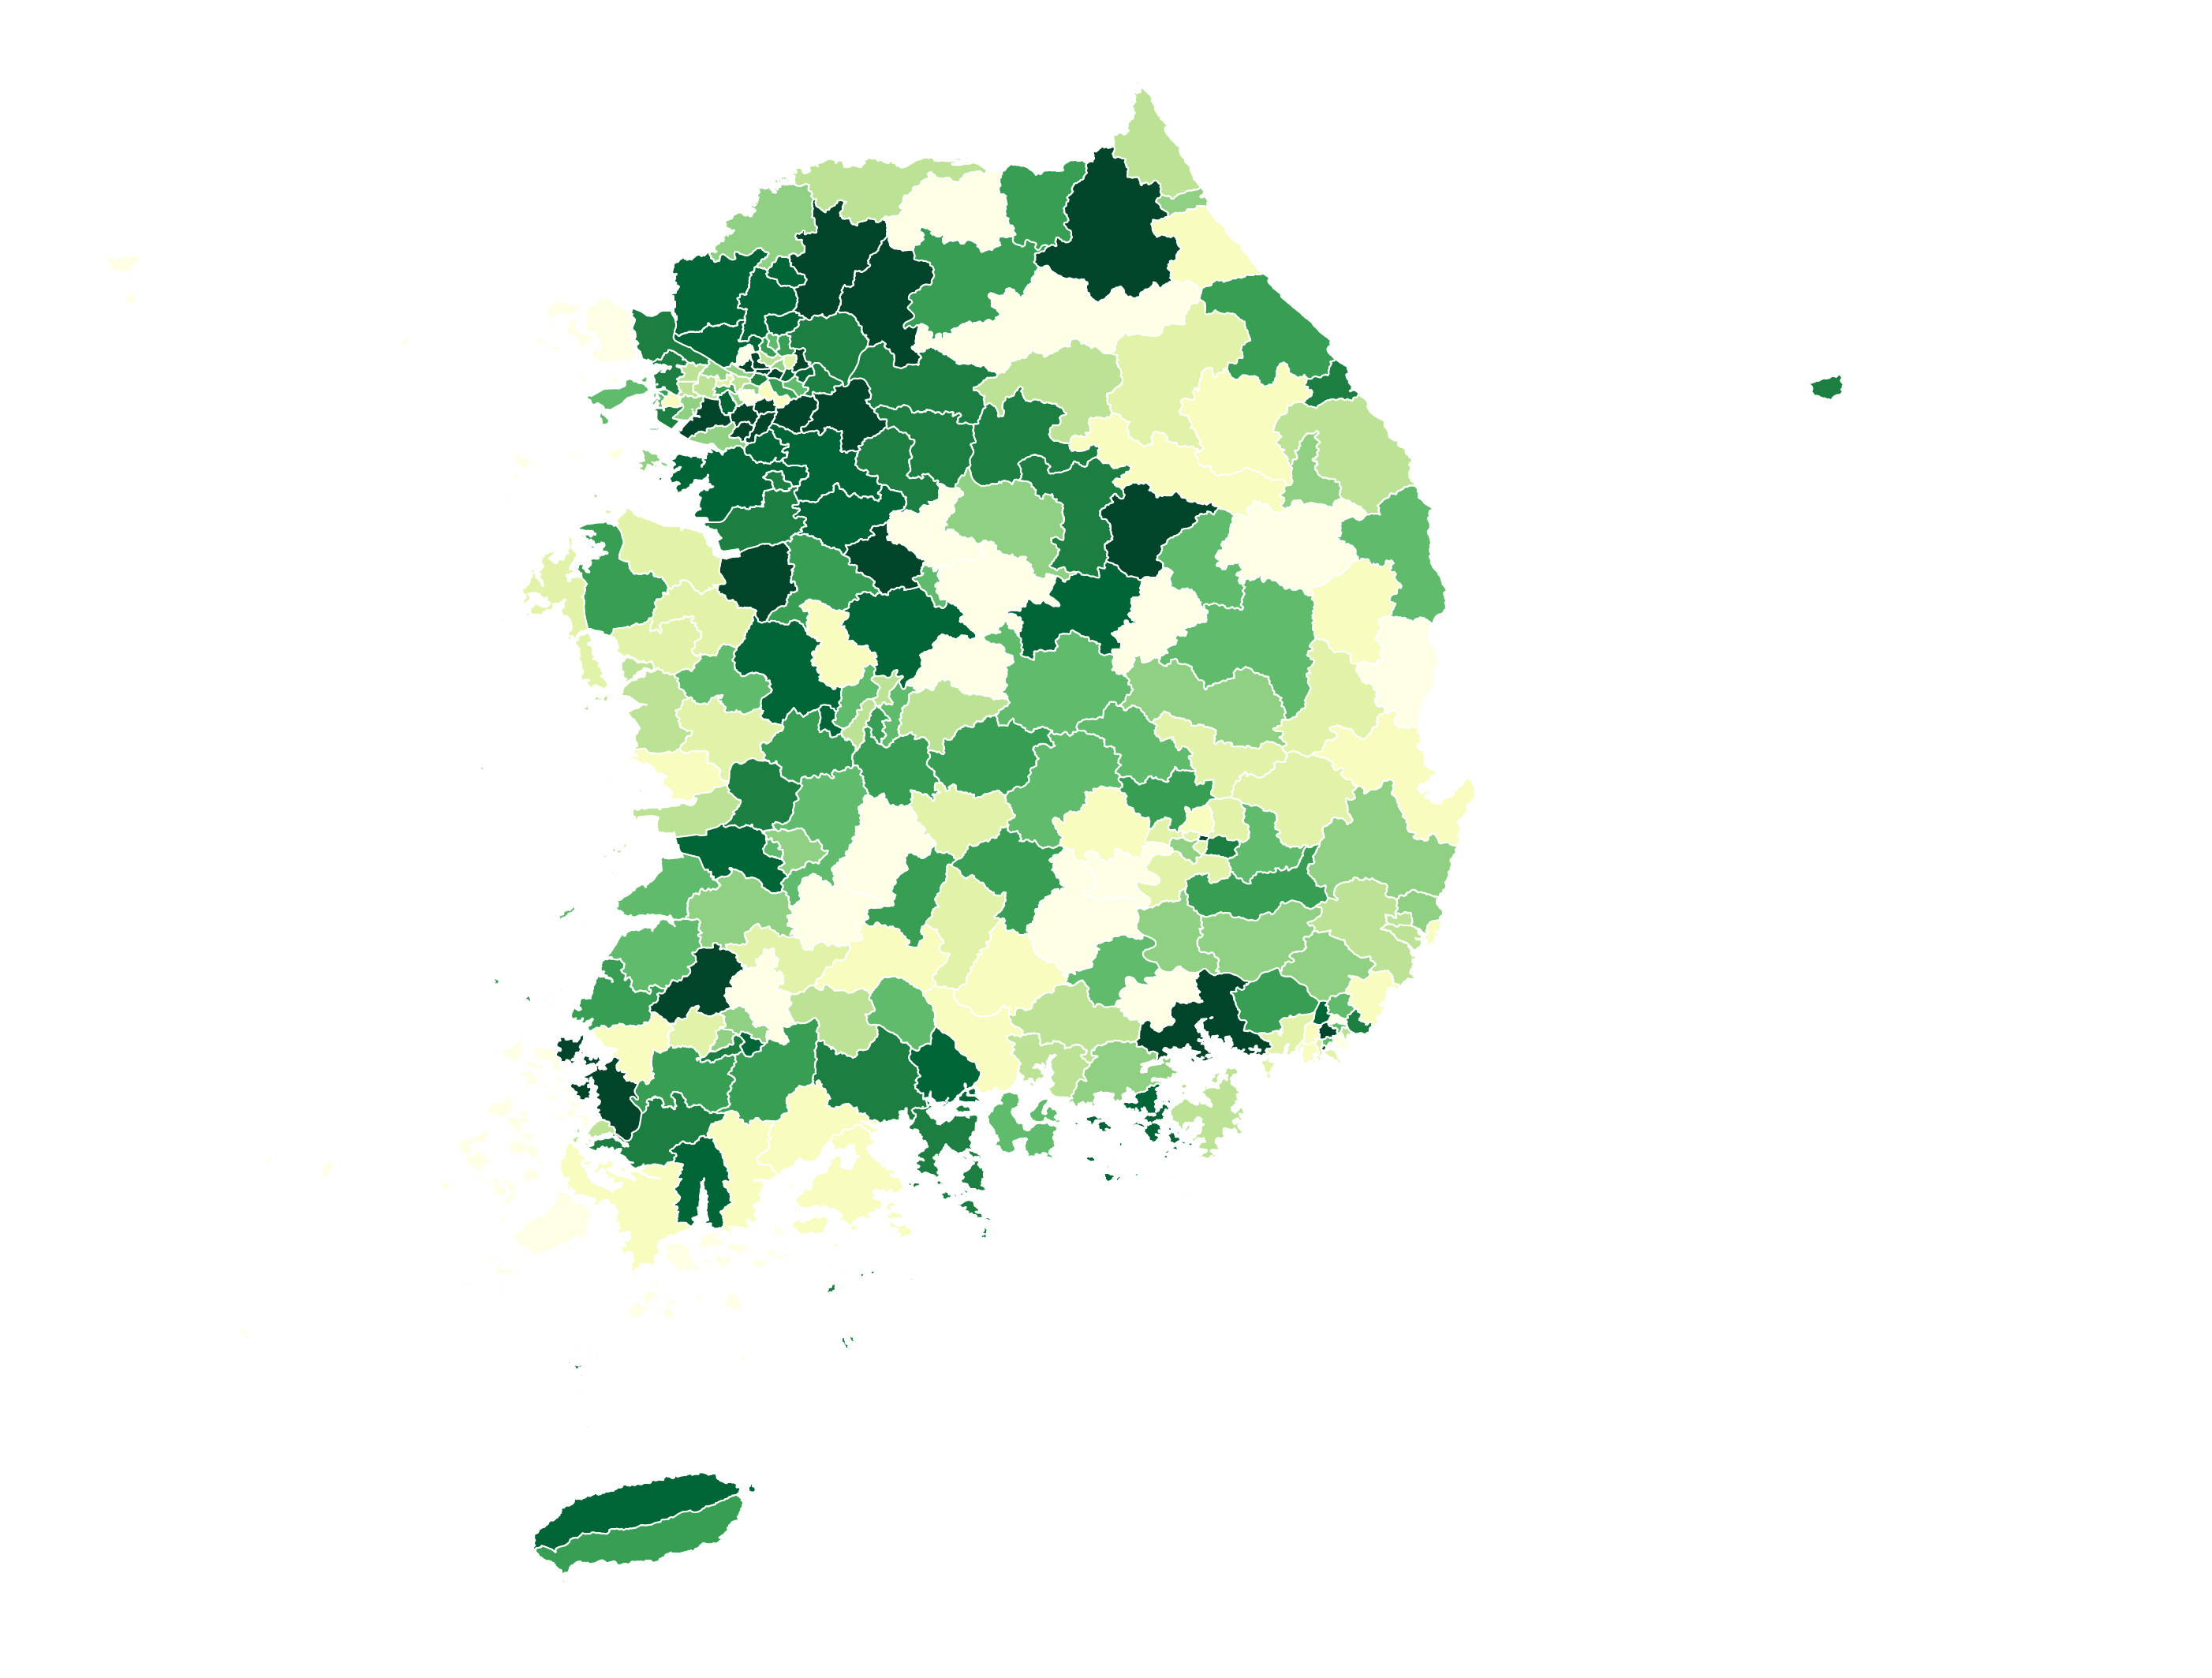

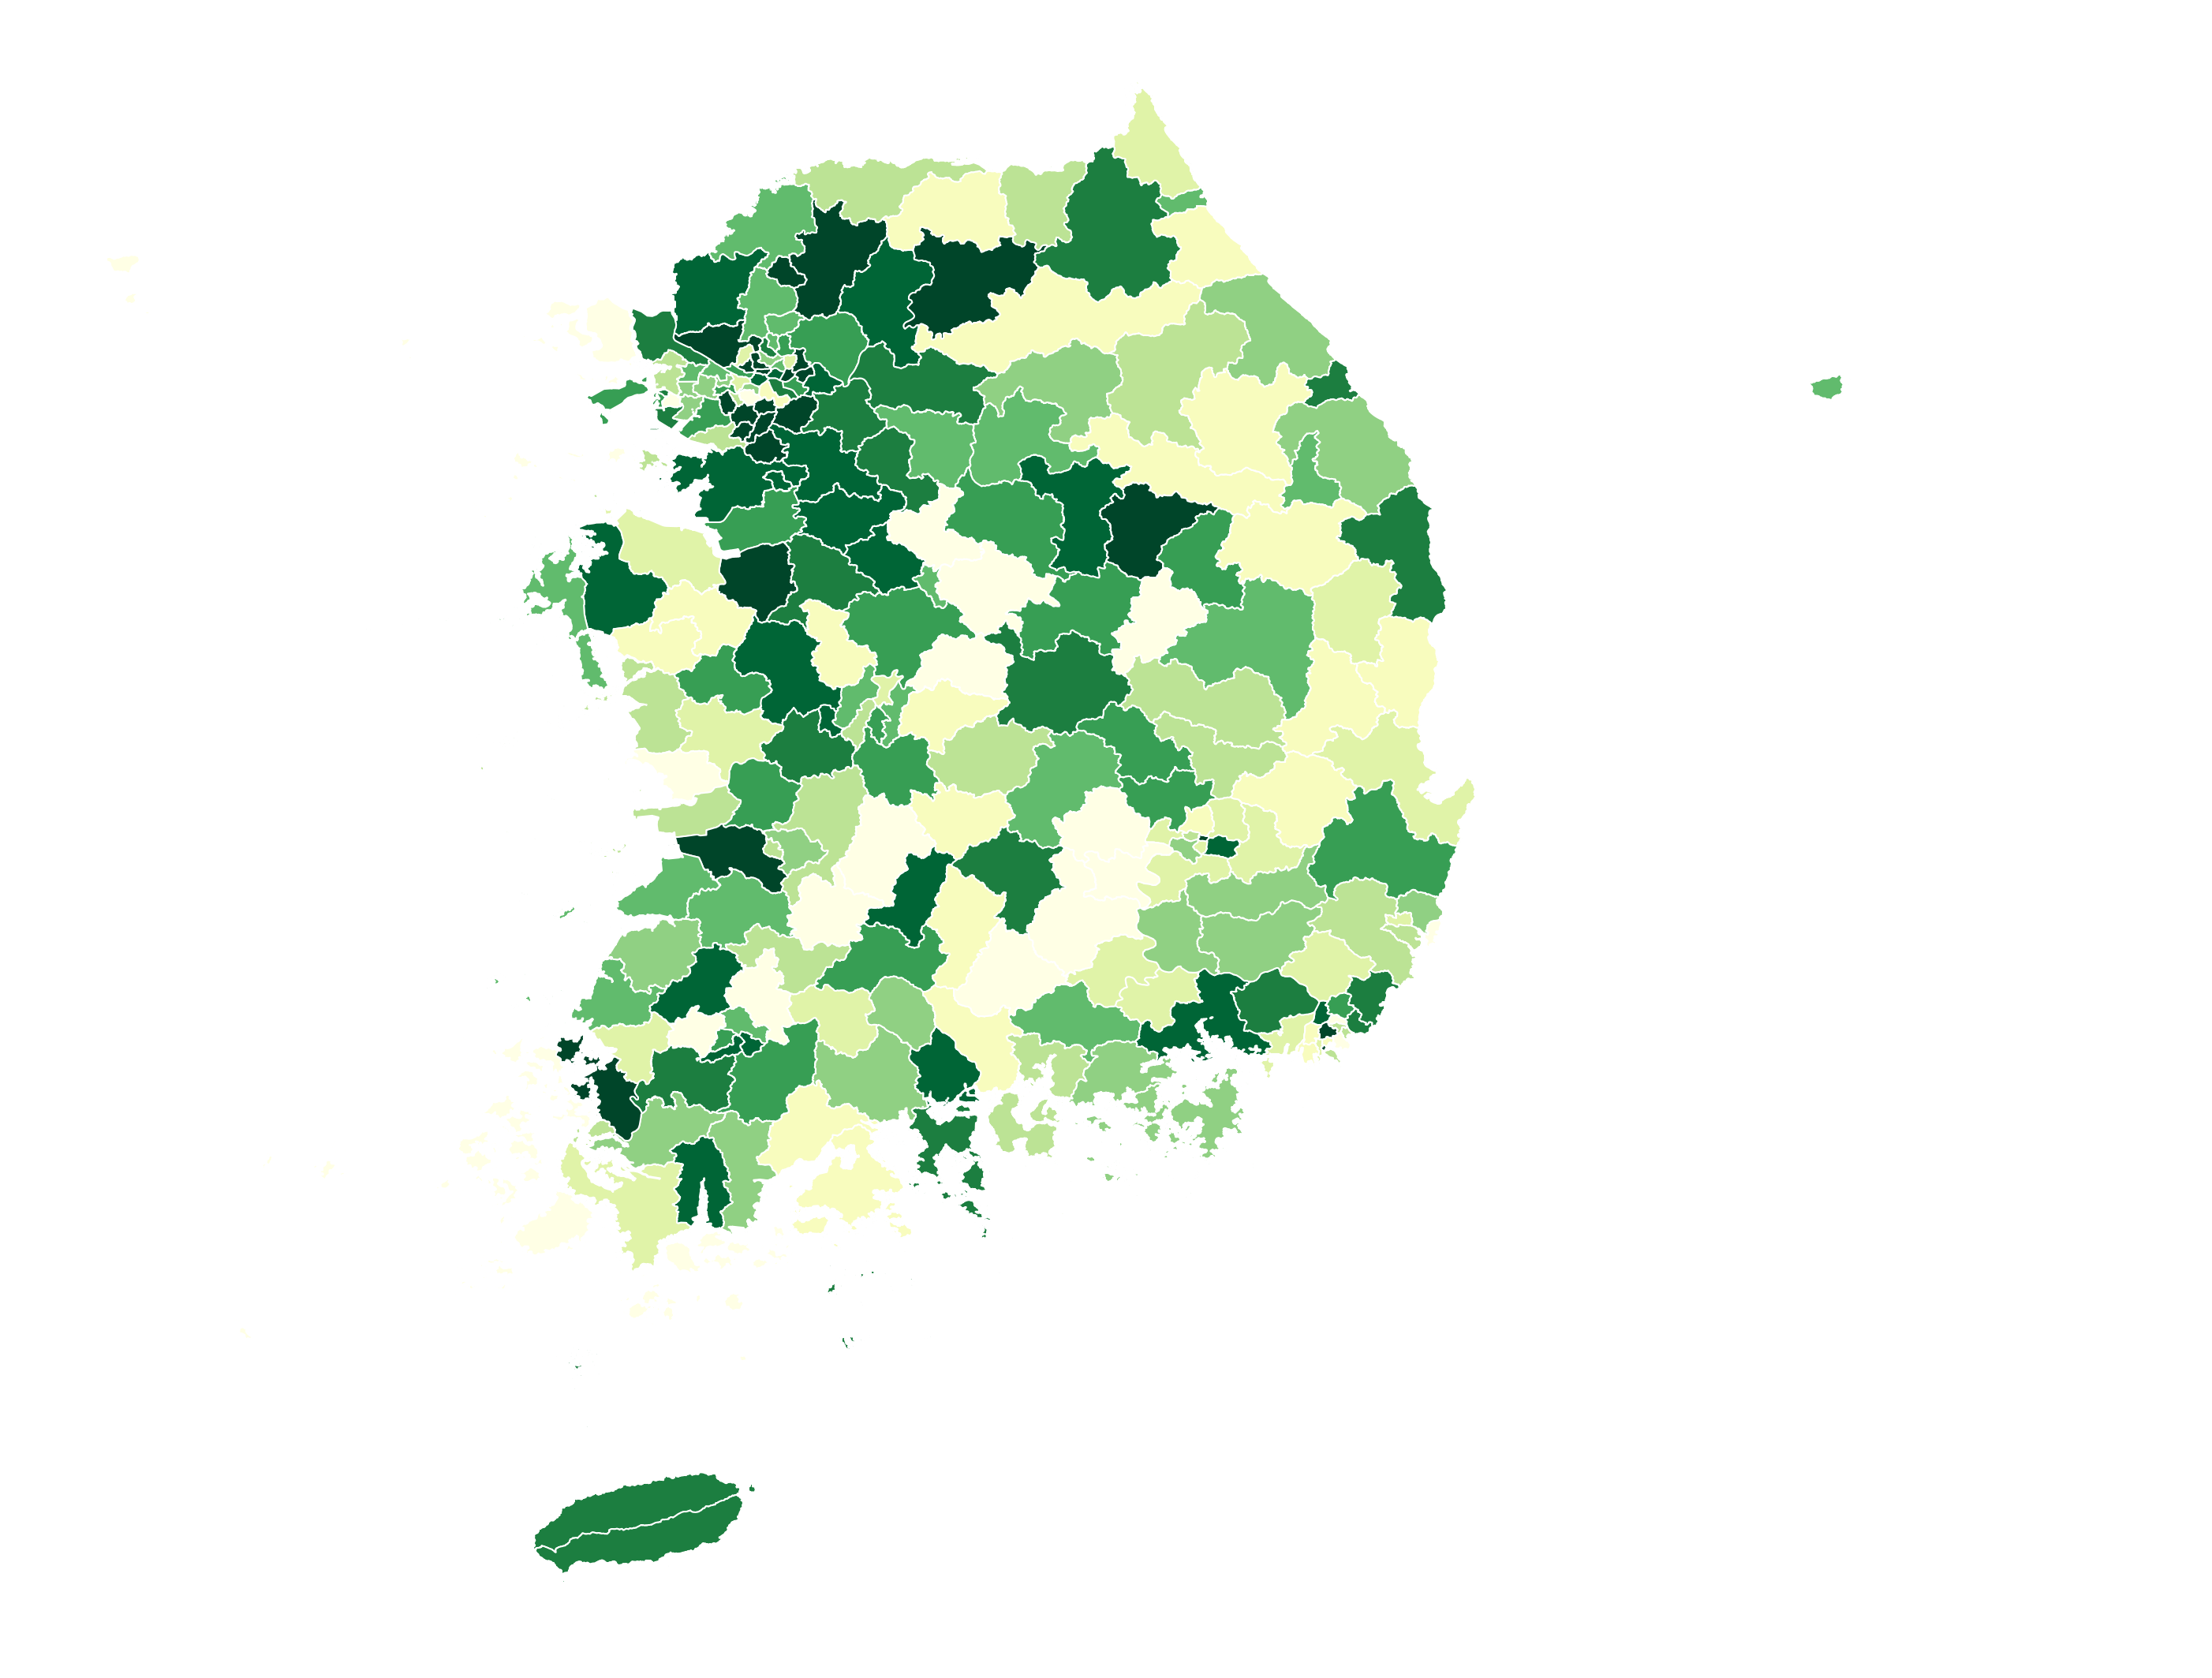

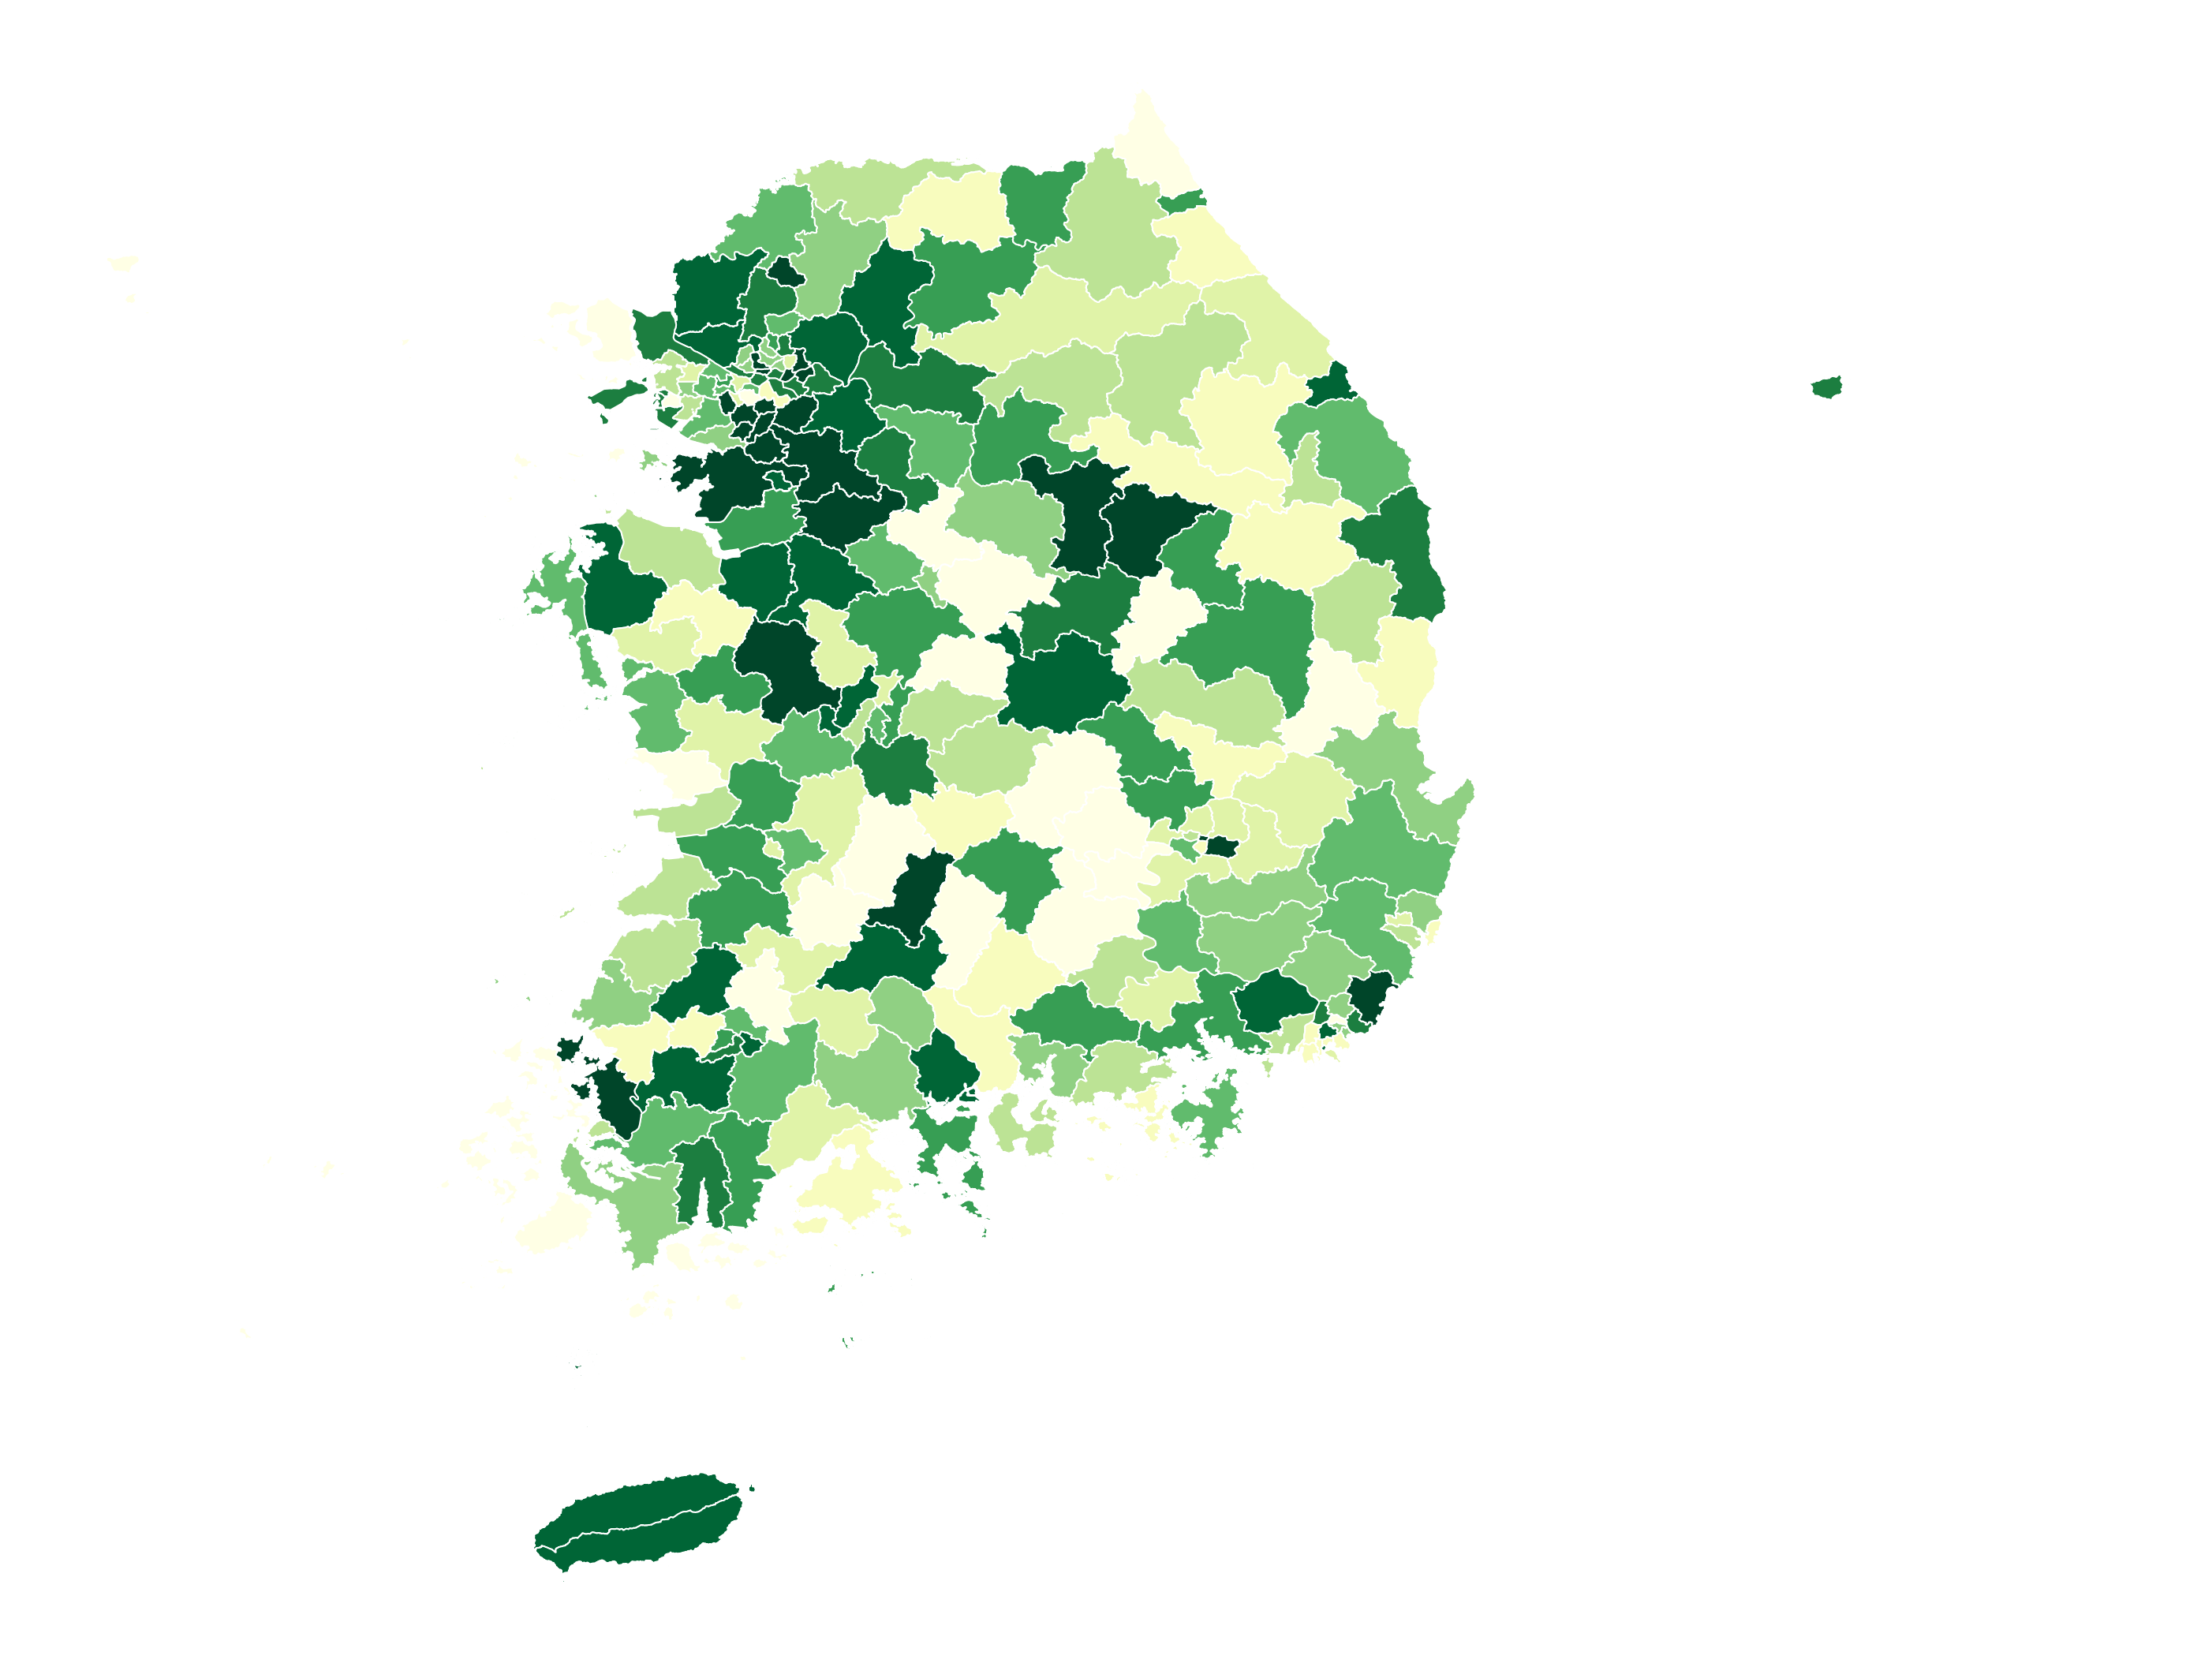

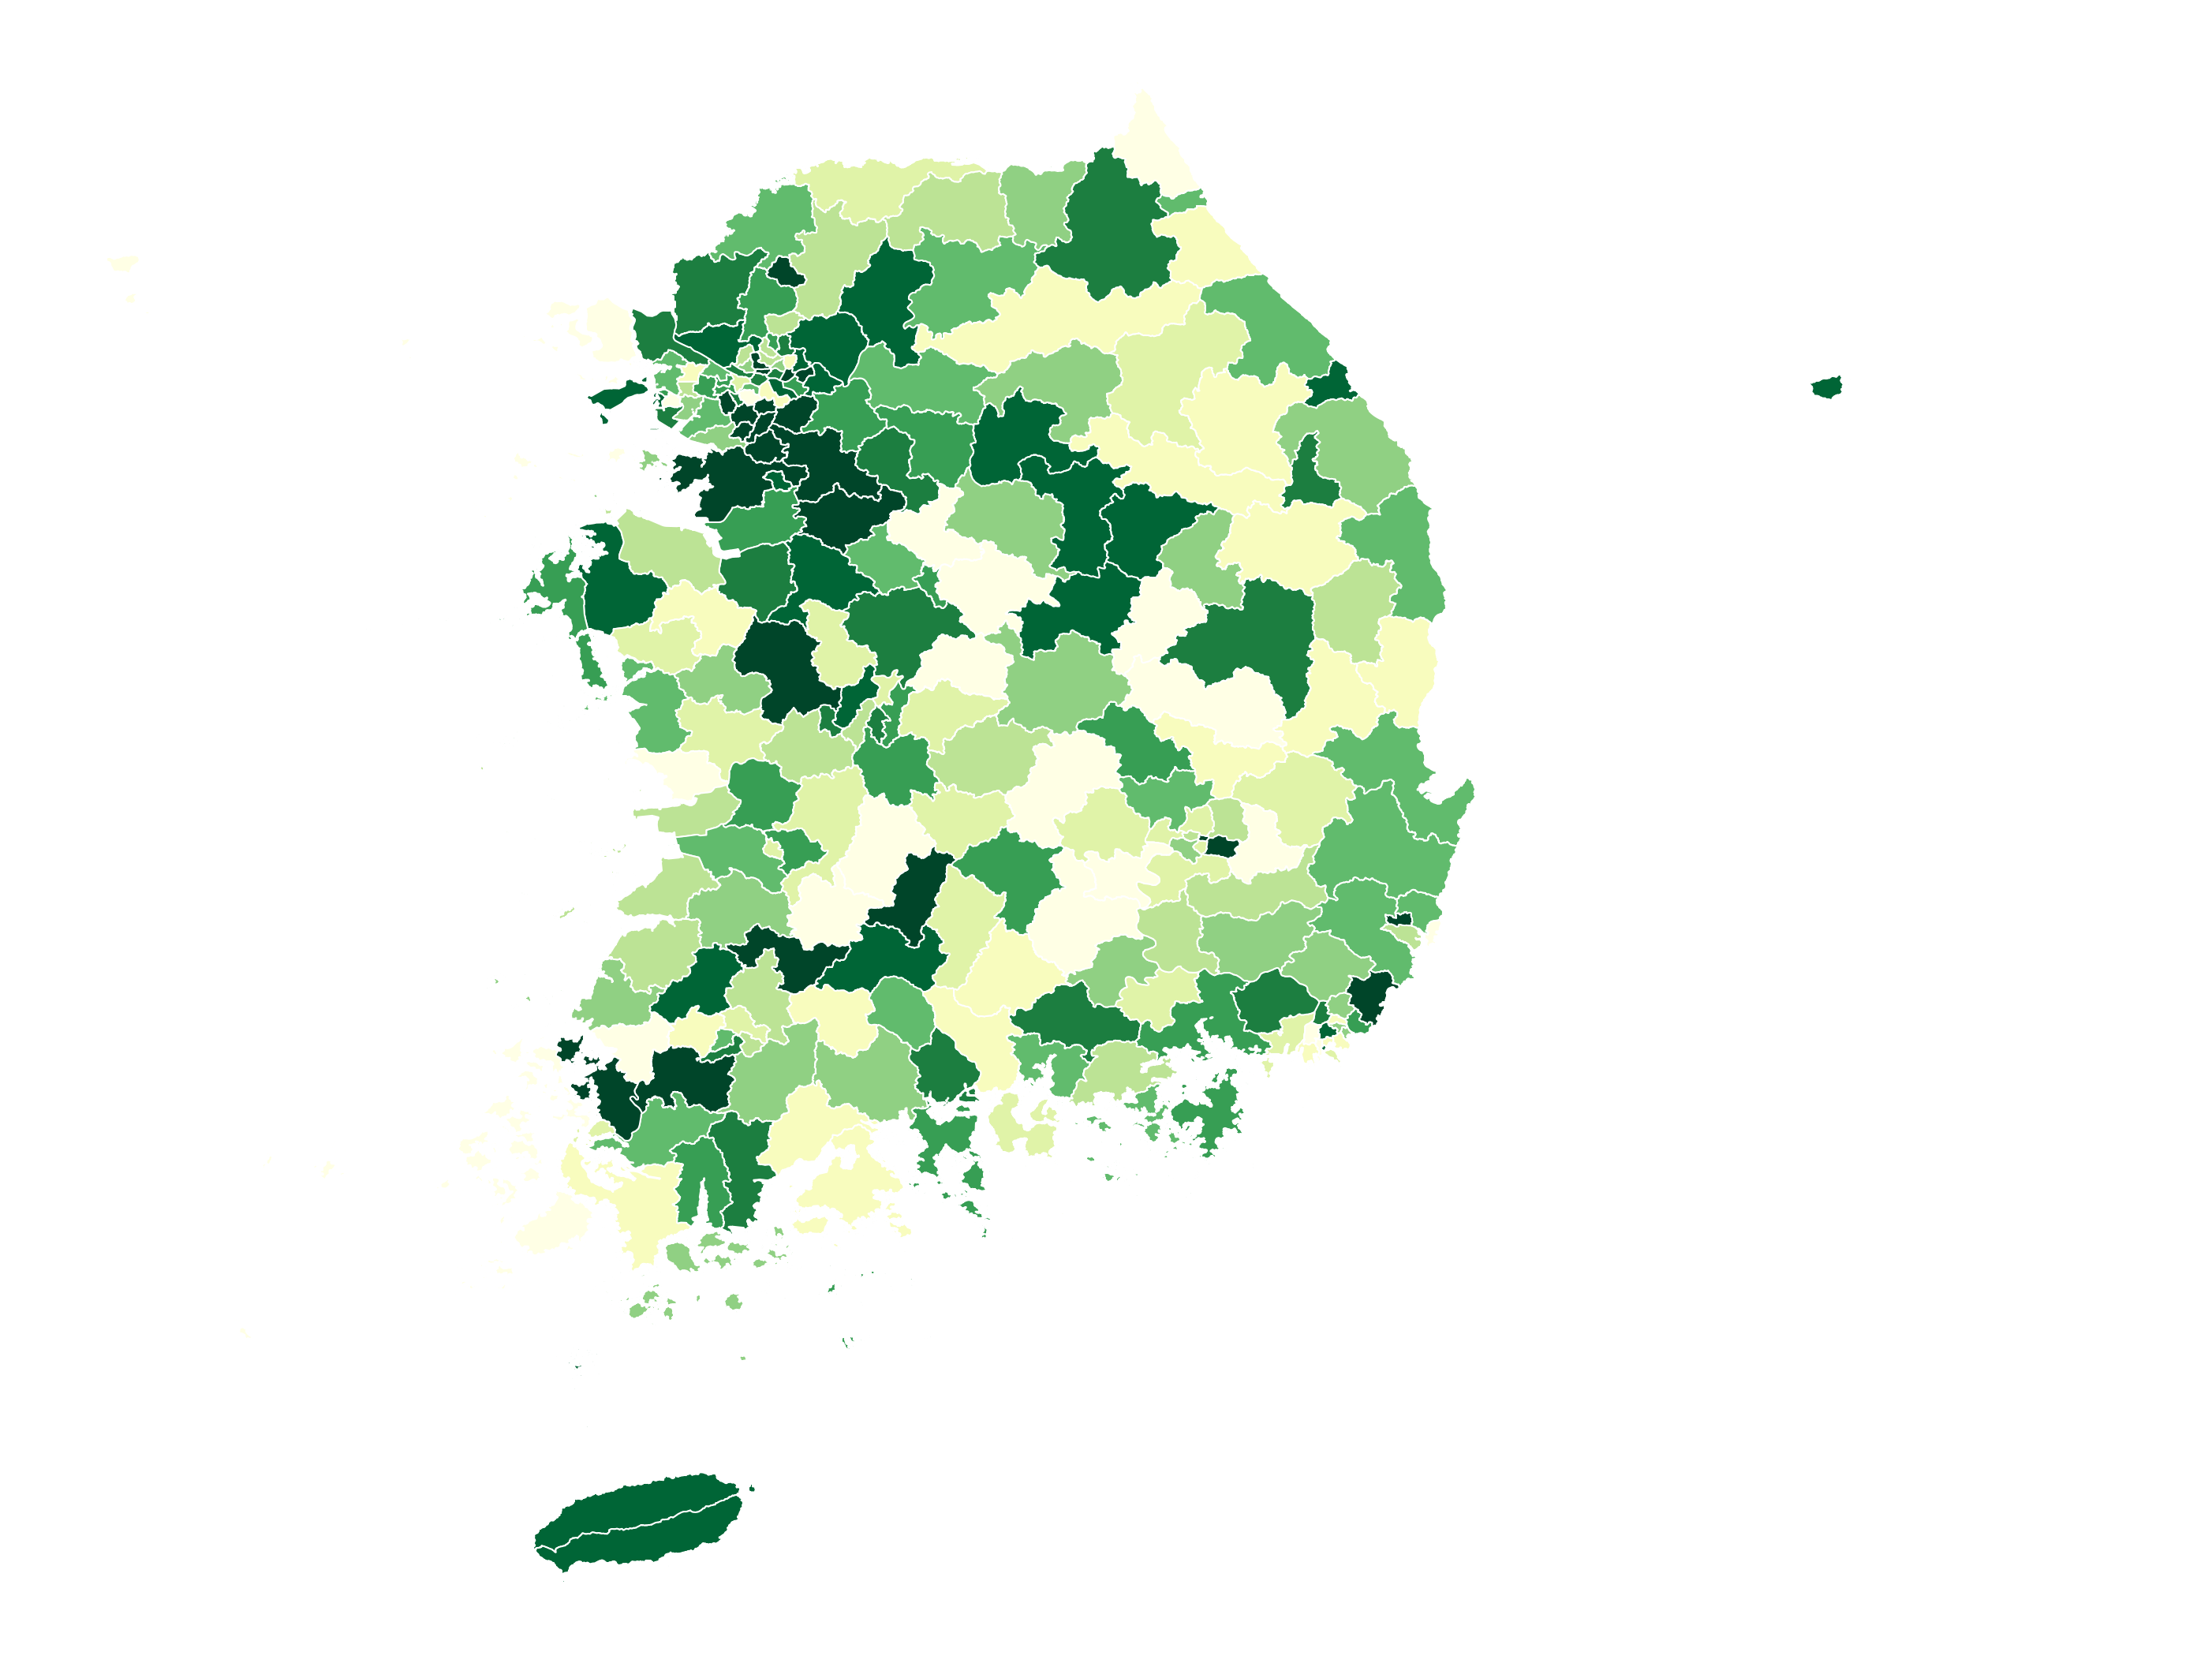

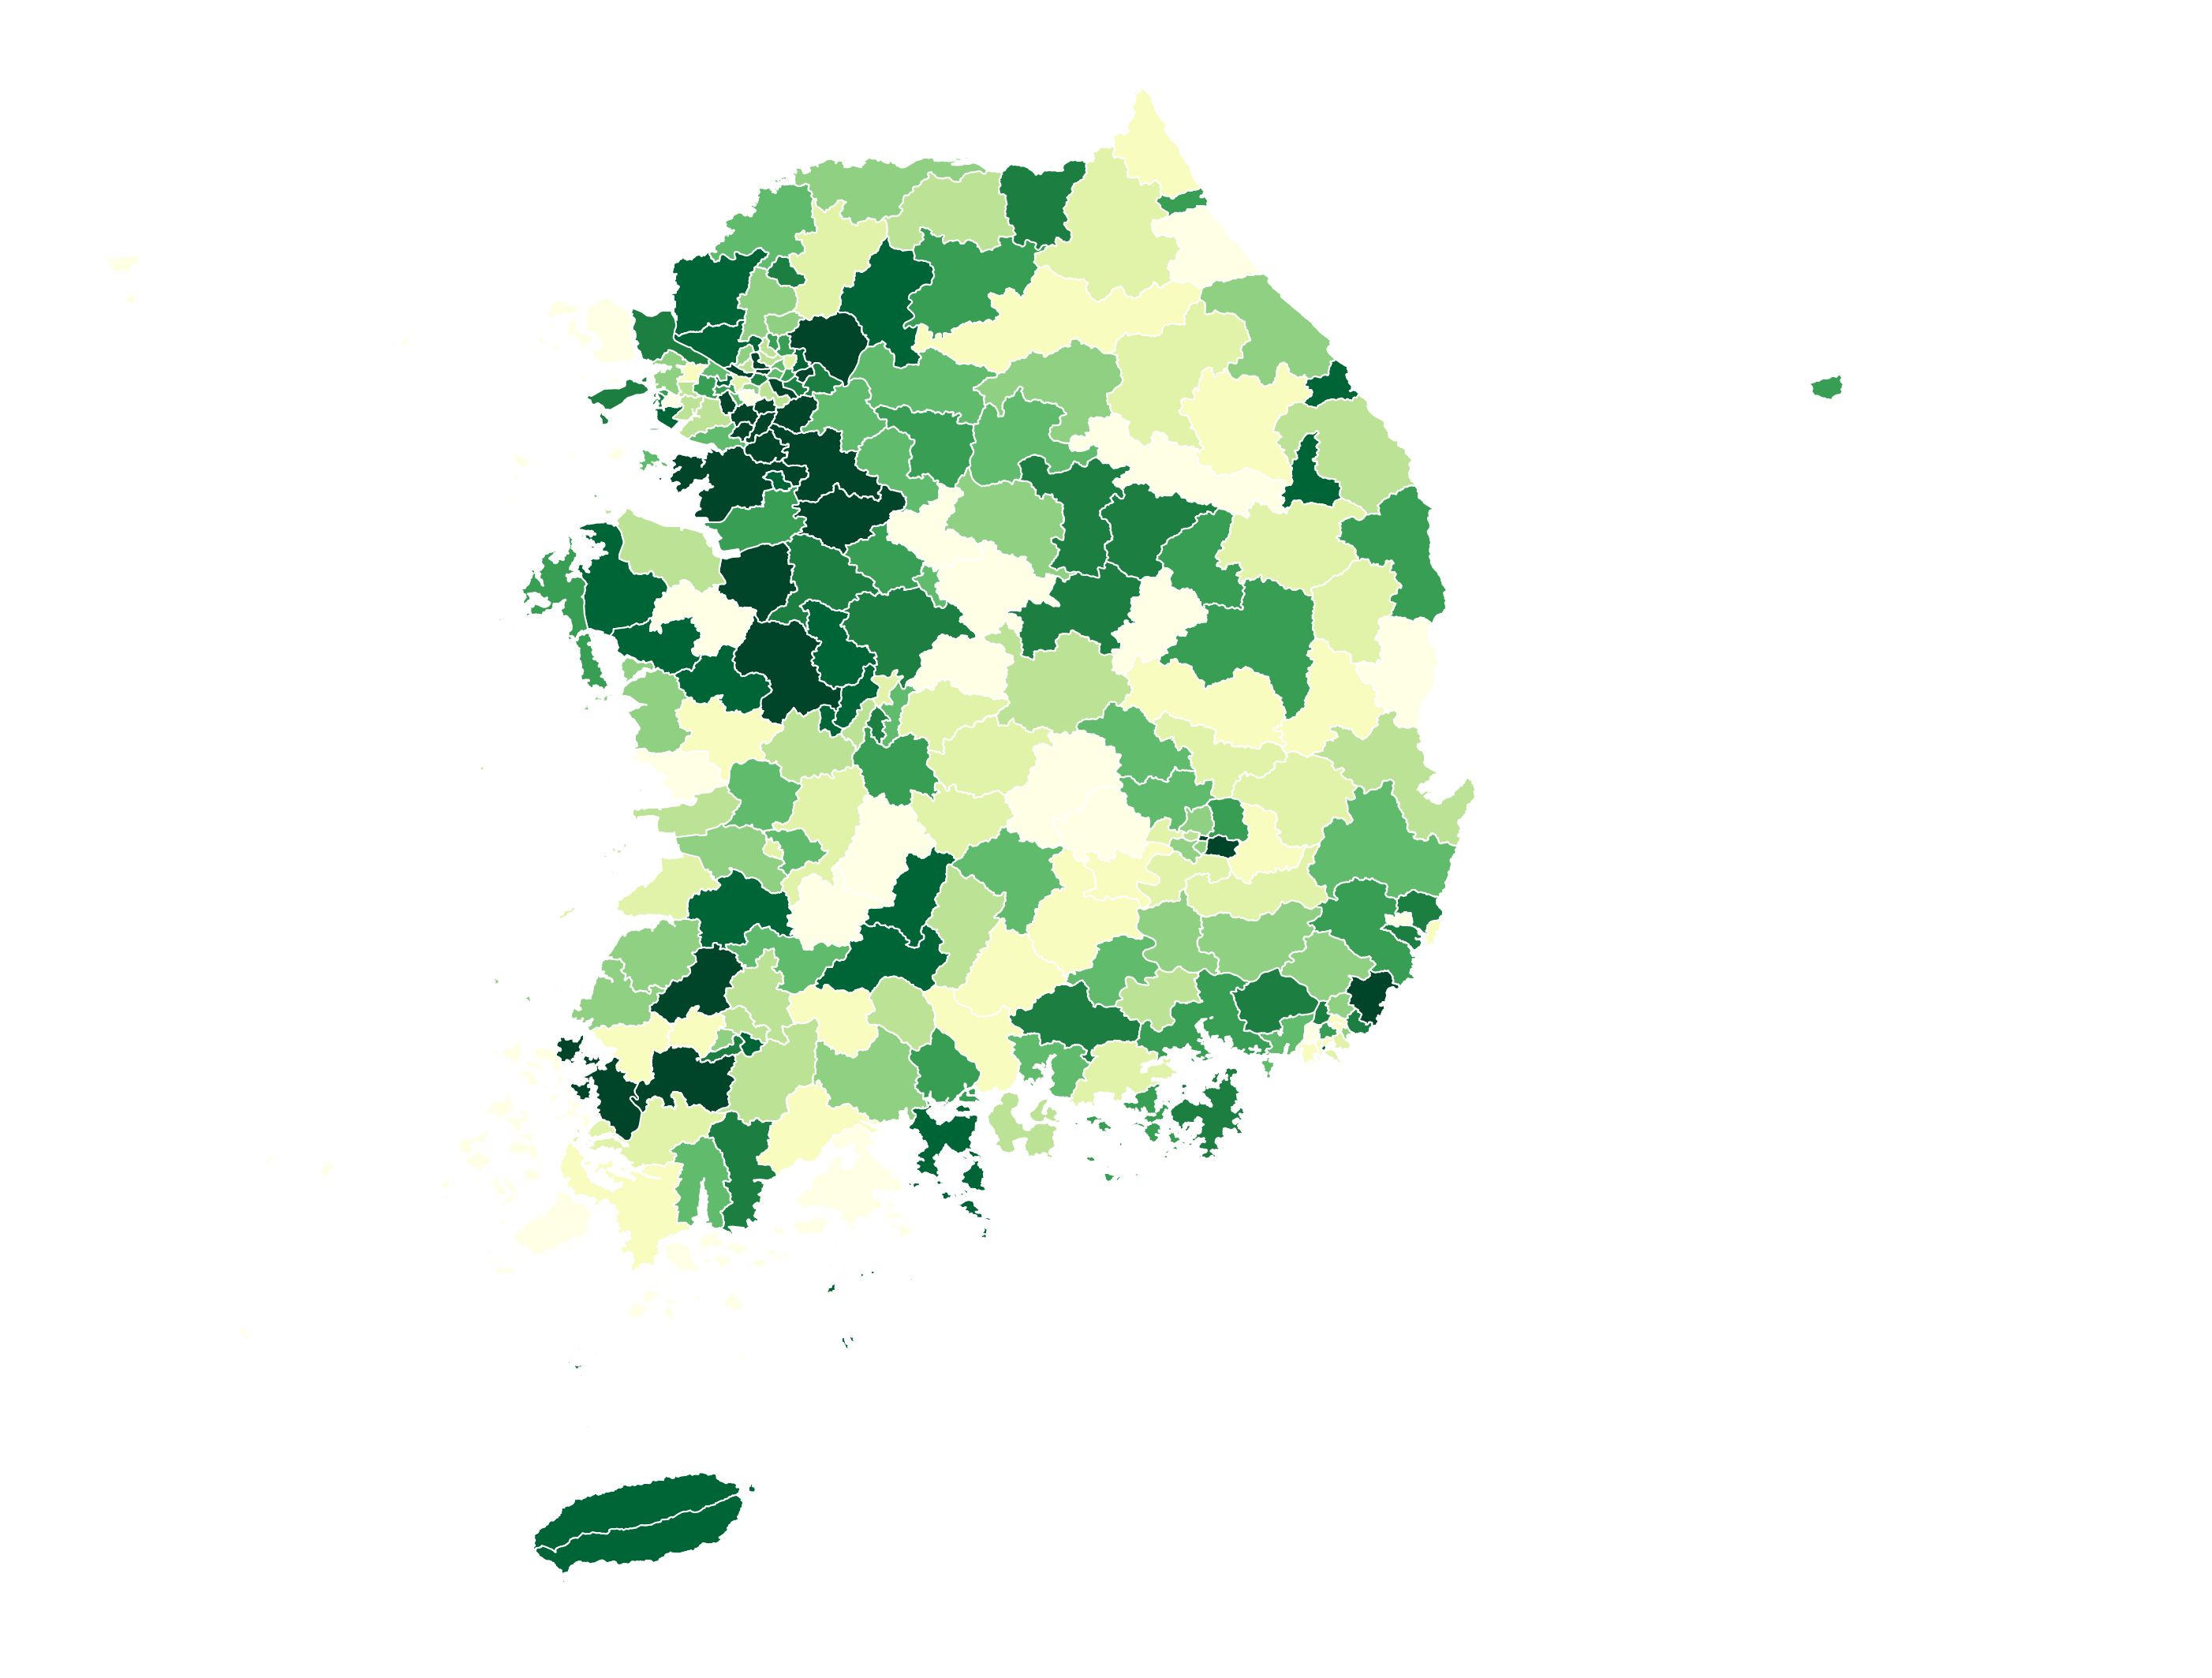

In [10]:
import matplotlib
from matplotlib.colors import TwoSlopeNorm, BoundaryNorm
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

fm.get_fontconfig_fonts()
font_location = 'C:\\Windows\\Fonts\malgun.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("poster")

plt.ioff()

for year in range(2014, 2019):

    year_data = dataset.loc[dataset['시점']==year].reset_index()
    year_data['1인당_대출권수'] = year_data['대출권수'] / year_data['총인구수'] 

    year_data_visu = gpd.GeoDataFrame(pd.merge(sgg_gdf, year_data, left_on ='SGG_AD_CD', right_on='시군구코드', how='inner'))

    # 10분위 수로 색을 칠하기
    bounds = np.percentile(year_data['1인당_대출권수'], np.linspace(0, 100, 11), interpolation='nearest')
    norm = BoundaryNorm(boundaries=bounds, ncolors=256)

    # create a normalized colorbar
    cmap = 'YlGn'
    cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmap)

    # 읍면동 시각화
    ax = year_data_visu.plot(
        figsize=(50, 50), column='1인당_대출권수', cmap=cmap, norm=norm, legend=False)
    ax.set_axis_off()

    plt.savefig(f'../img/4/loan/{str(year)}.png', bbox_inches = 'tight', pad_inches = 0)